In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from math import ceil
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from pandas.plotting import scatter_matrix
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn import metrics


/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [142]:
hitters = pd.read_csv('data/batters.csv')

In [3]:
hitters.head(10)

,.id,year,lvl,g,team_name,payroll,mlb_rk,tm_rk,centile,adj_slry,...,babip,iso,bb_percent,so_percent,ab_per_hr,xbh_percent,fpct,rfg,rfi,cs
0,ID=133910,1991,AA,102,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,97.814208,175.490196,17900.0,0.0
1,ID=2999,1999,NaN,84,NaN,NaN,NaN,NaN,NaN,NaN,...,0.288194,-25.26506,4.761905,12.324930,110.666667,22.352941,NaN,NaN,NaN,NaN
2,ID=78822,1989,A,33,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,96.153846,75.757576,2500.0,0.0
3,ID=15619,1963,MLB,117,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,94.909091,446.153846,52200.0,0.0
4,ID=7592,2010,NaN,119,NaN,NaN,NaN,NaN,NaN,NaN,...,0.319481,-29.39261,16.122841,8.445298,61.857143,22.480620,NaN,NaN,NaN,NaN
5,ID=137550,1992,Rk,20,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,40.000000,10.000000,200.0,0.0
6,ID=80713,1996,Rk,30,NaN,NaN,NaN,NaN,NaN,NaN,...,0.222222,-14.80000,7.920792,26.732673,80.000000,25.000000,98.367347,803.333333,24100.0,0.0
7,ID=7049,2005,AA,137,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98.104265,604.379562,82800.0,0.0
8,ID=4306,1998,Rk,31,Cincinnati Reds,-,NaN,NaN,NaN,2.932265e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,88.888889,129.032258,4000.0,0.0
9,ID=487,2002,MLB,10,Cincinnati Reds,Team Payroll,455.0,16.0,50.0,8.857691e+05,...,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN


In [4]:
hitters.shape[0]

232268

In [5]:
hitters.describe()

,year,g,mlb_rk,tm_rk,centile,adj_slry,adj_lg_min,adj_career_2date,adj_lifetime_earnings,adj_remaining_earnings,...,babip,iso,bb_percent,so_percent,ab_per_hr,xbh_percent,fpct,rfg,rfi,cs
count,232268.000000,232268.000000,32065.000000,32065.000000,20009.000000,3.342100e+04,32065.000000,3.342100e+04,3.342100e+04,3.342100e+04,...,112644.000000,115017.000000,115415.000000,115415.000000,115415.000000,1.054280e+05,138957.000000,138957.000000,138957.000000,138957.000000
mean,1989.646964,57.670945,507.392079,23.217121,57.152032,1.982973e+06,336885.961820,9.854730e+06,2.555718e+07,1.570245e+07,...,0.280486,-22.730344,8.112795,19.775342,59.455380,inf,88.190477,246.424234,13865.615454,0.501947
std,27.512740,42.331564,251.992743,13.352352,25.225373,3.625035e+06,142052.723683,2.326229e+07,4.232166e+07,3.169164e+07,...,0.121559,10.558752,6.976914,16.073723,67.660625,NaN,15.429522,244.817347,22014.428729,3.397886
min,1871.000000,1.000000,1.000000,1.000000,8.000000,6.079609e+02,123581.379395,6.079609e+02,8.268501e+04,0.000000e+00,...,-5.833333,-398.200000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1983.000000,23.000000,295.000000,12.000000,36.000000,3.200625e+05,187603.429918,6.806365e+05,2.240277e+06,5.124589e+05,...,0.247934,-27.860892,4.406780,11.111111,20.333333,1.774194e+01,85.714286,59.523810,400.000000,0.000000
50%,1997.000000,46.000000,572.000000,23.000000,57.000000,5.177066e+05,376544.123805,1.875658e+06,7.438278e+06,2.699148e+06,...,0.291939,-24.500000,7.788945,17.021277,38.500000,2.643678e+01,93.333333,162.962963,2500.000000,0.000000
75%,2008.000000,90.000000,753.000000,34.000000,79.000000,1.707734e+06,451142.361919,6.909031e+06,2.948771e+07,1.573549e+07,...,0.330279,-19.600000,11.039650,24.242424,73.000000,3.444444e+01,96.774194,367.741935,20200.000000,0.000000
max,2018.000000,624.000000,1358.000000,64.000000,100.000000,3.770422e+07,545000.000000,4.504805e+08,4.709065e+08,4.684782e+08,...,1.166667,1.166667,100.000000,100.000000,653.000000,inf,99.911348,8020.000000,603200.000000,89.000000


In [6]:
hitters.columns


Index(['.id', 'year', 'lvl', 'g', 'team_name', 'payroll', 'mlb_rk', 'tm_rk',
       'centile', 'adj_slry', 'adj_lg_min', 'adj_career_2date',
       'adj_lifetime_earnings', 'adj_remaining_earnings', 'scraped_under',
       'draft_year', 'position_when_drafted', 'player_listed_under',
       'proper_name', 'weight', 'bats', 'throws', 'place', 'high_school',
       'signing_bonus', 'awards', 'signing_scouts', 'college', 'relationships',
       'draft_team', 'draft_round', 'draft_posn', 'bdate',
       'pitcher_when_drafted', 'shortst_when_drafted', 'outfldr_when_drafted',
       'baseman_1_when_drafted', 'baseman_2_when_drafted',
       'baseman_3_when_drafted', 'height_inches', 'hschool_state', 'state',
       'draft_age', 'infl_adj_bonus', 'years_since_draft', 'age', 'sb', 'obp',
       'slg', 'ops', 'babip', 'iso', 'bb_percent', 'so_percent', 'ab_per_hr',
       'xbh_percent', 'fpct', 'rfg', 'rfi', 'cs'],
      dtype='object')

In [7]:
hitters.dtypes


.id                        object
year                        int64
lvl                        object
g                           int64
team_name                  object
payroll                    object
mlb_rk                    float64
tm_rk                     float64
centile                   float64
adj_slry                  float64
adj_lg_min                float64
adj_career_2date          float64
adj_lifetime_earnings     float64
adj_remaining_earnings    float64
scraped_under              object
draft_year                float64
position_when_drafted      object
player_listed_under        object
proper_name                object
weight                    float64
bats                       object
throws                     object
place                      object
high_school                object
signing_bonus             float64
awards                    float64
signing_scouts             object
college                    object
relationships              object
draft_team    

In [8]:
hitters.head()

,.id,year,lvl,g,team_name,payroll,mlb_rk,tm_rk,centile,adj_slry,...,babip,iso,bb_percent,so_percent,ab_per_hr,xbh_percent,fpct,rfg,rfi,cs
0,ID=133910,1991,AA,102,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,97.814208,175.490196,17900.0,0.0
1,ID=2999,1999,NaN,84,NaN,NaN,NaN,NaN,NaN,NaN,...,0.288194,-25.26506,4.761905,12.324930,110.666667,22.352941,NaN,NaN,NaN,NaN
2,ID=78822,1989,A,33,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,96.153846,75.757576,2500.0,0.0
3,ID=15619,1963,MLB,117,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,94.909091,446.153846,52200.0,0.0
4,ID=7592,2010,NaN,119,NaN,NaN,NaN,NaN,NaN,NaN,...,0.319481,-29.39261,16.122841,8.445298,61.857143,22.480620,NaN,NaN,NaN,NaN


In [9]:
hitters1990 = hitters[hitters.year == 1990]

In [10]:
hitters1990.shape     

(4340, 60)

In [11]:
hitters1991 = hitters[hitters.year == 1991]

In [12]:
hitters1991.shape


(4294, 60)

In [13]:
hitters['adj_slry'].isnull().count()

232268

In [14]:
hitters.shape

(232268, 60)

In [15]:
hitters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232268 entries, 0 to 232267
Data columns (total 60 columns):
.id                       232268 non-null object
year                      232268 non-null int64
lvl                       219803 non-null object
g                         232268 non-null int64
team_name                 33421 non-null object
payroll                   33421 non-null object
mlb_rk                    32065 non-null float64
tm_rk                     32065 non-null float64
centile                   20009 non-null float64
adj_slry                  33421 non-null float64
adj_lg_min                32065 non-null float64
adj_career_2date          33421 non-null float64
adj_lifetime_earnings     33421 non-null float64
adj_remaining_earnings    33421 non-null float64
scraped_under             33421 non-null object
draft_year                149275 non-null float64
position_when_drafted     153034 non-null object
player_listed_under       232189 non-null object
proper_name

In [16]:
hitters1990.head()

,.id,year,lvl,g,team_name,payroll,mlb_rk,tm_rk,centile,adj_slry,...,babip,iso,bb_percent,so_percent,ab_per_hr,xbh_percent,fpct,rfg,rfi,cs
16,ID=136924,1990,Rk,27,NaN,NaN,NaN,NaN,NaN,NaN,...,0.273810,-23.947368,2.000000,11.000000,95.000000,8.695652,85.593220,374.074074,10100.0,0.0
30,ID=96484,1990,A+,136,NaN,NaN,NaN,NaN,NaN,NaN,...,0.285068,-25.831193,4.931973,15.816327,30.277778,29.370629,NaN,NaN,NaN,NaN
108,ID=136068,1990,Rk,13,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,97.142857,261.538462,3400.0,0.0
120,ID=98909,1990,Rk,35,NaN,NaN,NaN,NaN,NaN,NaN,...,0.230769,-18.508929,6.400000,17.600000,112.000000,23.809524,NaN,NaN,NaN,NaN
173,ID=89408,1990,AAA,92,NaN,NaN,NaN,NaN,NaN,NaN,...,0.271277,-22.391111,14.339623,14.339623,225.000000,19.607843,NaN,NaN,NaN,NaN


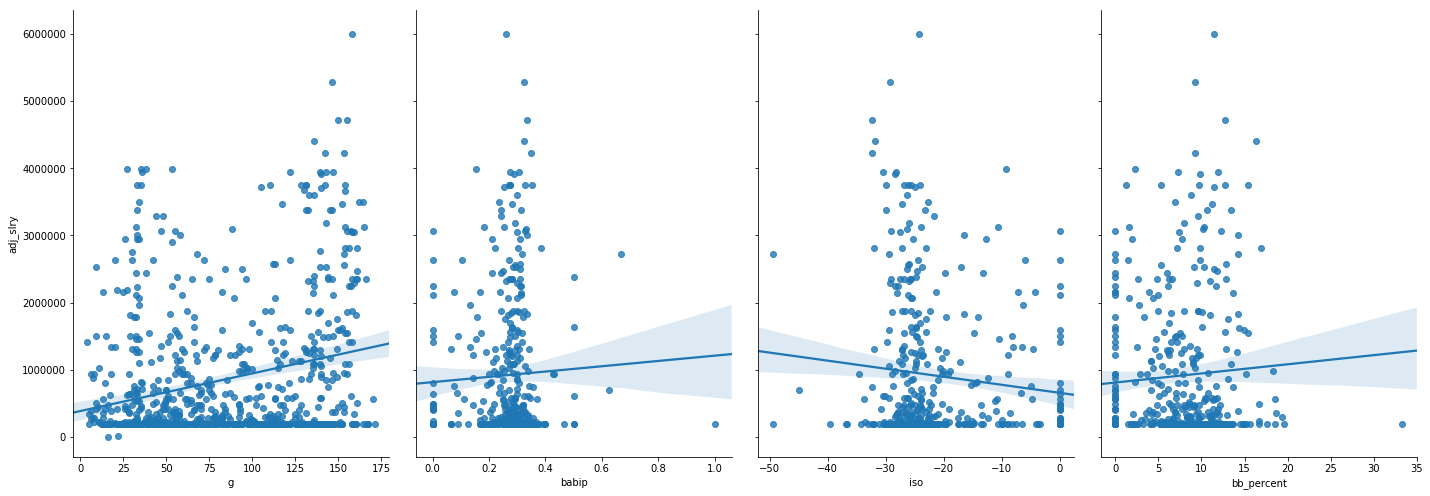

In [17]:
sns.pairplot(hitters1990,x_vars=['g','babip','iso','bb_percent'],y_vars='adj_slry',size=7,aspect=0.7,kind='reg')

In [18]:
features = ['g','iso','babip','ops','ab_per_hr']

In [20]:
X = hitters1990[features]

In [21]:
y = hitters1990['adj_slry']

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1)

In [23]:
linreg = LinearRegression()
linreg.fit(X_train,y_train)
print(linreg.intercept_)
print(linreg.coef_)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [24]:
hitters.head()

,.id,year,lvl,g,team_name,payroll,mlb_rk,tm_rk,centile,adj_slry,...,babip,iso,bb_percent,so_percent,ab_per_hr,xbh_percent,fpct,rfg,rfi,cs
0,ID=133910,1991,AA,102,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,97.814208,175.490196,17900.0,0.0
1,ID=2999,1999,NaN,84,NaN,NaN,NaN,NaN,NaN,NaN,...,0.288194,-25.26506,4.761905,12.324930,110.666667,22.352941,NaN,NaN,NaN,NaN
2,ID=78822,1989,A,33,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,96.153846,75.757576,2500.0,0.0
3,ID=15619,1963,MLB,117,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,94.909091,446.153846,52200.0,0.0
4,ID=7592,2010,NaN,119,NaN,NaN,NaN,NaN,NaN,NaN,...,0.319481,-29.39261,16.122841,8.445298,61.857143,22.480620,NaN,NaN,NaN,NaN


In [25]:
hitters

,.id,year,lvl,g,team_name,payroll,mlb_rk,tm_rk,centile,adj_slry,...,babip,iso,bb_percent,so_percent,ab_per_hr,xbh_percent,fpct,rfg,rfi,cs
0,ID=133910,1991,AA,102,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,97.814208,175.490196,17900.000000,0.0
1,ID=2999,1999,NaN,84,NaN,NaN,NaN,NaN,NaN,NaN,...,0.288194,-25.265060,4.761905,12.324930,110.666667,22.352941,NaN,NaN,NaN,NaN
2,ID=78822,1989,A,33,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,96.153846,75.757576,2500.000000,0.0
3,ID=15619,1963,MLB,117,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,94.909091,446.153846,52200.000000,0.0
4,ID=7592,2010,NaN,119,NaN,NaN,NaN,NaN,NaN,NaN,...,0.319481,-29.392610,16.122841,8.445298,61.857143,22.480620,NaN,NaN,NaN,NaN
5,ID=137550,1992,Rk,20,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,40.000000,10.000000,200.000000,0.0
6,ID=80713,1996,Rk,30,NaN,NaN,NaN,NaN,NaN,NaN,...,0.222222,-14.800000,7.920792,26.732673,80.000000,25.000000,98.367347,803.333333,24100.000000,0.0
7,ID=7049,2005,AA,137,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98.104265,604.379562,82800.000000,0.0
8,ID=4306,1998,Rk,31,Cincinnati Reds,-,NaN,NaN,NaN,2.932265e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,88.888889,129.032258,4000.000000,0.0
9,ID=487,2002,MLB,10,Cincinnati Reds,Team Payroll,455.0,16.0,50.0,8.857691e+05,...,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN


In [26]:
hitters[hitters['lvl'] =='MLB']

,.id,year,lvl,g,team_name,payroll,mlb_rk,tm_rk,centile,adj_slry,...,babip,iso,bb_percent,so_percent,ab_per_hr,xbh_percent,fpct,rfg,rfi,cs
3,ID=15619,1963,MLB,117,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,94.909091,446.153846,52200.000000,0.0
9,ID=487,2002,MLB,10,Cincinnati Reds,Team Payroll,455.0,16.0,50.0,8.857691e+05,...,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
10,ID=191042,1880,MLB,2,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,6.000000,NaN,NaN,NaN,NaN,NaN
13,ID=148183,2017,MLB,33,Arizona Diamondbacks,Team Payroll,297.0,7.0,68.0,3.950000e+06,...,0.250000,-12.339286,8.571429,40.000000,56.000000,14.285714,97.872340,139.393939,24.210526,5.0
18,ID=38550,2015,MLB,129,Boston Red Sox,Team Payroll,218.0,11.0,76.0,5.688024e+06,...,0.311728,-24.796209,11.498973,19.712526,70.333333,18.867925,NaN,NaN,NaN,NaN
20,ID=12974,1945,MLB,74,NaN,NaN,NaN,NaN,NaN,NaN,...,0.301075,-25.315315,8.400000,14.000000,111.000000,28.070175,NaN,NaN,NaN,NaN
27,ID=191190,1893,MLB,34,NaN,NaN,NaN,NaN,NaN,NaN,...,0.292035,-28.750000,12.230216,3.597122,40.000000,22.857143,86.821705,329.411765,11200.000000,0.0
35,ID=190911,1895,MLB,1,NaN,NaN,NaN,NaN,NaN,NaN,...,0.333333,-33.000000,0.000000,0.000000,3.000000,0.000000,NaN,NaN,NaN,NaN
41,ID=8675,1962,MLB,34,NaN,NaN,NaN,NaN,NaN,NaN,...,0.277778,-16.500000,10.144928,34.782609,60.000000,0.000000,NaN,NaN,NaN,NaN
42,ID=12143,1987,MLB,107,Boston Red Sox,Team Payroll,595.0,21.0,NaN,1.294361e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,96.111111,161.682243,17300.000000,0.0


In [27]:
nosal = hitters[hitters.adj_slry.isna()] 

In [28]:
nosal = nosal[nosal.year>=1985]

In [29]:
nosal = nosal[nosal.lvl == 'MLB']

In [30]:
nosal.head(20)


,.id,year,lvl,g,team_name,payroll,mlb_rk,tm_rk,centile,adj_slry,...,babip,iso,bb_percent,so_percent,ab_per_hr,xbh_percent,fpct,rfg,rfi,cs
255,ID=153118,2014,MLB,25,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,92.000000,92.000000,95.833333,3.0
330,ID=171013,2018,MLB,3,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,50.000000,2.000000,NaN,NaN,NaN,NaN,NaN
7598,ID=6843,2007,MLB,61,NaN,NaN,NaN,NaN,NaN,NaN,...,0.245283,-19.446970,10.322581,18.064516,132.000000,23.076923,NaN,NaN,NaN,NaN
10535,ID=181660,2018,MLB,18,NaN,NaN,NaN,NaN,NaN,NaN,...,0.388889,-29.642857,5.405405,21.621622,70.000000,14.285714,NaN,NaN,NaN,NaN
14656,ID=171118,2018,MLB,3,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,2.000000,NaN,NaN,NaN,NaN,NaN
25191,ID=907,1996,MLB,51,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,95.370370,201.960784,10300.000000,0.0
29982,ID=101260,2006,MLB,111,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98.319328,421.621622,48.397104,0.0
32258,ID=124257,2018,MLB,5,NaN,NaN,NaN,NaN,NaN,NaN,...,0.142857,-9.000000,0.000000,33.333333,11.000000,0.000000,NaN,NaN,NaN,NaN
36767,ID=188430,2018,MLB,22,NaN,NaN,NaN,NaN,NaN,NaN,...,0.403226,-32.871795,8.235294,17.647059,39.000000,26.923077,NaN,NaN,NaN,NaN
55102,ID=5670,2004,MLB,99,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98.092643,727.272727,36000.000000,0.0


In [31]:
namesnosal = nosal[['proper_name','adj_slry','ops']]

In [32]:
namesnosal.head()

,proper_name,adj_slry,ops
255,Erik C. Johnson,NaN,NaN
330,Corey Edward Oswalt,NaN,0.000000
7598,Michael Gregory Rouse,NaN,53.476821
10535,Rafael Darwing Bautista,NaN,69.498069
14656,Max Dorian Fried,NaN,0.000000


In [33]:
namesnosal.type

AttributeError: 'DataFrame' object has no attribute 'type'

In [34]:
namesnosal.info

<bound method DataFrame.info of                            proper_name  adj_slry         ops
255                    Erik C. Johnson       NaN         NaN
330                Corey Edward Oswalt       NaN    0.000000
7598             Michael Gregory Rouse       NaN   53.476821
10535          Rafael Darwing Bautista       NaN   69.498069
14656                 Max Dorian Fried       NaN    0.000000
25191         Eugene Humphrey Kingsale       NaN         NaN
29982               Alexander Gonzalez       NaN         NaN
32258                  Tanner B. Roark       NaN   18.181818
36767             Gleyber David Torres       NaN   84.977376
55102              Joseph Carl Hietpas       NaN         NaN
55551             Brian James Esposito       NaN         NaN
55755               James Eugene Burke       NaN         NaN
57684            Benjamin Joseph Gamel       NaN   60.078278
62130                Adam Jeremy Stern       NaN         NaN
63800                  Erik C. Johnson       NaN    0

In [35]:
namesnosal.head(40)


,proper_name,adj_slry,ops
255,Erik C. Johnson,NaN,NaN
330,Corey Edward Oswalt,NaN,0.000000
7598,Michael Gregory Rouse,NaN,53.476821
10535,Rafael Darwing Bautista,NaN,69.498069
14656,Max Dorian Fried,NaN,0.000000
25191,Eugene Humphrey Kingsale,NaN,NaN
29982,Alexander Gonzalez,NaN,NaN
32258,Tanner B. Roark,NaN,18.181818
36767,Gleyber David Torres,NaN,84.977376
55102,Joseph Carl Hietpas,NaN,NaN


In [36]:
hitters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232268 entries, 0 to 232267
Data columns (total 60 columns):
.id                       232268 non-null object
year                      232268 non-null int64
lvl                       219803 non-null object
g                         232268 non-null int64
team_name                 33421 non-null object
payroll                   33421 non-null object
mlb_rk                    32065 non-null float64
tm_rk                     32065 non-null float64
centile                   20009 non-null float64
adj_slry                  33421 non-null float64
adj_lg_min                32065 non-null float64
adj_career_2date          33421 non-null float64
adj_lifetime_earnings     33421 non-null float64
adj_remaining_earnings    33421 non-null float64
scraped_under             33421 non-null object
draft_year                149275 non-null float64
position_when_drafted     153034 non-null object
player_listed_under       232189 non-null object
proper_name

In [37]:
hitters.draft_posn

0           75.0
1            NaN
2         1033.0
3            NaN
4          126.0
5            NaN
6            NaN
7          288.0
8            7.0
9          172.0
10           NaN
11        1362.0
12         399.0
13          80.0
14          67.0
15          17.0
16           NaN
17         875.0
18         256.0
19         868.0
20           NaN
21         773.0
22           NaN
23         598.0
24           NaN
25           NaN
26         772.0
27           NaN
28         873.0
29         642.0
           ...  
232238     183.0
232239       NaN
232240      44.0
232241       NaN
232242       NaN
232243     102.0
232244     181.0
232245       NaN
232246       NaN
232247       NaN
232248     199.0
232249       4.0
232250      30.0
232251      19.0
232252       NaN
232253     760.0
232254      69.0
232255       NaN
232256     524.0
232257     186.0
232258    1092.0
232259      16.0
232260     128.0
232261     598.0
232262    1070.0
232263     100.0
232264       NaN
232265     100

In [38]:
namesnosal = nosal[['proper_name','adj_slry','ops','draft_posn','sb','lvl','year']]

In [39]:
namesnosal.shape

(63, 7)

In [45]:
bdud = hitters[hitters.year > 1985]

In [56]:
currenthitters = hitters[hitters.year>=1985]

In [57]:
currenthitters = currenthitters[['proper_name', 'lvl','ops','draft_posn','year','adj_slry']]

In [58]:
currenthitters.head(30)

,proper_name,lvl,ops,draft_posn,year,adj_slry
0,Rafael Kenneth Jackson,AA,NaN,75.0,1991,NaN
1,Bernardino Torres,NaN,63.196696,NaN,1999,NaN
2,James Thomas Foley,A,NaN,1033.0,1989,NaN
4,Julian Jawann Redman,NaN,80.994273,126.0,2010,NaN
5,Jeffrey W. Leystra,Rk,NaN,NaN,1992,NaN
6,Christopher Paul Grubbs,Rk,51.683168,NaN,1996,NaN
7,Richard Corey Slavik,AA,NaN,288.0,2005,NaN
8,Austin Ryan Kearns,Rk,NaN,7.0,1998,2.932265e+06
9,Jose Leonel Silva,MLB,NaN,172.0,2002,8.857691e+05
11,Aaron Russell Morris,A-,59.966763,1362.0,1991,NaN


In [59]:
bdud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165889 entries, 0 to 232267
Data columns (total 60 columns):
.id                       165889 non-null object
year                      165889 non-null int64
lvl                       154542 non-null object
g                         165889 non-null int64
team_name                 32665 non-null object
payroll                   32665 non-null object
mlb_rk                    31334 non-null float64
tm_rk                     31334 non-null float64
centile                   19603 non-null float64
adj_slry                  32665 non-null float64
adj_lg_min                31334 non-null float64
adj_career_2date          32665 non-null float64
adj_lifetime_earnings     32665 non-null float64
adj_remaining_earnings    32665 non-null float64
scraped_under             32665 non-null object
draft_year                125766 non-null float64
position_when_drafted     129002 non-null object
player_listed_under       165845 non-null object
proper_name

In [71]:
bdud = currenthitters[currenthitters.adj_slry.isna()]


In [72]:
bdud.head(40)

,proper_name,lvl,ops,draft_posn,year,adj_slry
0,Rafael Kenneth Jackson,AA,NaN,75.0,1991,NaN
1,Bernardino Torres,NaN,63.196696,NaN,1999,NaN
2,James Thomas Foley,A,NaN,1033.0,1989,NaN
4,Julian Jawann Redman,NaN,80.994273,126.0,2010,NaN
5,Jeffrey W. Leystra,Rk,NaN,NaN,1992,NaN
6,Christopher Paul Grubbs,Rk,51.683168,NaN,1996,NaN
7,Richard Corey Slavik,AA,NaN,288.0,2005,NaN
11,Aaron Russell Morris,A-,59.966763,1362.0,1991,NaN
14,Ronald Ames Guidry,AAA,NaN,67.0,1989,NaN
15,Eduardo Antanacio Perez,AA,NaN,17.0,1992,NaN


In [76]:
foo = currenthitters.groupby('proper_name')


In [78]:
foo.head(40)

,proper_name,lvl,ops,draft_posn,year,adj_slry
0,Rafael Kenneth Jackson,AA,NaN,75.0,1991,NaN
1,Bernardino Torres,NaN,63.196696,NaN,1999,NaN
2,James Thomas Foley,A,NaN,1033.0,1989,NaN
4,Julian Jawann Redman,NaN,80.994273,126.0,2010,NaN
5,Jeffrey W. Leystra,Rk,NaN,NaN,1992,NaN
6,Christopher Paul Grubbs,Rk,51.683168,NaN,1996,NaN
7,Richard Corey Slavik,AA,NaN,288.0,2005,NaN
8,Austin Ryan Kearns,Rk,NaN,7.0,1998,2.932265e+06
9,Jose Leonel Silva,MLB,NaN,172.0,2002,8.857691e+05
11,Aaron Russell Morris,A-,59.966763,1362.0,1991,NaN


In [80]:
hitters[hitters.proper_name == 'Zane William Smith']

,.id,year,lvl,g,team_name,payroll,mlb_rk,tm_rk,centile,adj_slry,...,babip,iso,bb_percent,so_percent,ab_per_hr,xbh_percent,fpct,rfg,rfi,cs
63054,ID=18214,1987,MLB,41,Atlanta Braves,Team Payroll,306.0,15.0,56.0,5.393172e+05,...,0.161290,-12.986842,3.191489,14.893617,76.0,20.000000,NaN,NaN,NaN,NaN
83353,ID=18214,1991,MLB,35,Pittsburgh Pirates,Team Payroll,84.0,4.0,89.0,4.004589e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,92.727273,145.714286,22.270742,0.0
125058,ID=18214,1993,MLB,18,Pittsburgh Pirates,Team Payroll,116.0,3.0,88.0,4.623834e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,95.238095,111.111111,23.809524,0.0
145902,ID=18214,1989,MLB,53,"Montreal Expos, Atlanta Braves","Team Payroll, Team Payroll",197.0,8.0,75.0,1.285246e+06,...,0.206897,-18.531250,0.000000,8.333333,32.0,16.666667,NaN,NaN,NaN,NaN
149108,ID=18214,1985,MLB,42,Atlanta Braves,Team Payroll,516.0,30.0,NaN,1.367263e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,91.304348,100.000000,28.378378,0.0
166544,ID=18214,1988,MLB,23,Atlanta Braves,Team Payroll,235.0,9.0,66.0,9.327370e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,96.078431,213.043478,34.751773,0.0
175362,ID=18214,1994,MLB,25,Pittsburgh Pirates,Team Payroll,107.0,3.0,89.0,5.167813e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,97.959184,192.000000,30.379747,0.0
195741,ID=18214,1991,MLB,36,Pittsburgh Pirates,Team Payroll,84.0,4.0,89.0,4.004589e+06,...,0.203125,-18.084507,3.370787,8.988764,71.0,23.076923,NaN,NaN,NaN,NaN
203417,ID=18214,1992,MLB,26,Pittsburgh Pirates,Team Payroll,99.0,6.0,88.0,4.410929e+06,...,0.157895,-12.081633,3.703704,20.370370,49.0,33.333333,NaN,NaN,NaN,NaN
210860,ID=18214,1983,A+,27,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98.571429,255.555556,6900.000000,0.0


In [81]:
hitters[hitters.proper_name == 'Ichiro Suzuki']

,.id,year,lvl,g,team_name,payroll,mlb_rk,tm_rk,centile,adj_slry,...,babip,iso,bb_percent,so_percent,ab_per_hr,xbh_percent,fpct,rfg,rfi,cs
12386,ID=1467,2011,MLB,161,Seattle Mariners,Team Payroll,17.0,1.0,99.0,1.961489e+07,...,0.294893,-26.843427,5.409154,9.570042,112.833333,16.304348,NaN,NaN,NaN,NaN
23652,ID=1467,2003,MLB,159,Seattle Mariners,Team Payroll,152.0,9.0,82.0,6.258628e+06,...,0.332776,-30.786451,4.965517,9.517241,48.500000,23.584906,99.147727,219.496855,25.511696,0.0
37900,ID=1467,2013,MLB,153,New York Yankees,Team Payroll,154.0,14.0,83.0,6.839365e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,98.479087,169.281046,22.839506,0.0
45426,ID=1467,2008,MLB,162,Seattle Mariners,Team Payroll,6.0,1.0,100.0,1.947062e+07,...,0.334410,-30.663265,6.809079,8.678238,98.000000,15.492958,98.449612,235.185185,27.410072,0.0
58485,ID=1467,2015,MLB,153,Miami Marlins,Team Payroll,391.0,13.0,57.0,2.068373e+06,...,0.257143,-22.585427,7.077626,11.643836,199.000000,13.186813,NaN,NaN,NaN,NaN
63731,ID=1467,1994,NaN,130,NaN,NaN,NaN,NaN,NaN,NaN,...,0.410417,-37.912088,8.542714,8.877722,39.000000,28.095238,NaN,NaN,NaN,NaN
67233,ID=1467,2012,MLB,177,"New York Yankees, Seattle Mariners","Team Payroll, Team Payroll",23.0,3.0,98.0,1.921721e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,99.346405,171.751412,22.568671,0.0
121095,ID=1467,2006,MLB,162,Seattle Mariners,Team Payroll,28.0,3.0,97.0,1.519902e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,98.938992,230.246914,26.642857,0.0
133601,ID=1467,2017,MLB,136,Miami Marlins,Team Payroll,386.0,16.0,58.0,2.000000e+06,...,0.297468,-25.178571,7.906977,16.279070,49.000000,18.000000,NaN,NaN,NaN,NaN
135534,ID=1467,2017,MLB,36,Miami Marlins,Team Payroll,386.0,16.0,58.0,2.000000e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,98.484848,180.555556,28.761062,0.0


In [85]:
hitters[(hitters.adj_slry.isnull())&(hitters.lvl =='MLB')].head()

,.id,year,lvl,g,team_name,payroll,mlb_rk,tm_rk,centile,adj_slry,...,babip,iso,bb_percent,so_percent,ab_per_hr,xbh_percent,fpct,rfg,rfi,cs
3,ID=15619,1963,MLB,117,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,94.909091,446.153846,52200.0,0.0
10,ID=191042,1880,MLB,2,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,6.0,NaN,NaN,NaN,NaN,NaN
20,ID=12974,1945,MLB,74,NaN,NaN,NaN,NaN,NaN,NaN,...,0.301075,-25.315315,8.400000,14.000000,111.0,28.070175,NaN,NaN,NaN,NaN
27,ID=191190,1893,MLB,34,NaN,NaN,NaN,NaN,NaN,NaN,...,0.292035,-28.750000,12.230216,3.597122,40.0,22.857143,86.821705,329.411765,11200.0,0.0
35,ID=190911,1895,MLB,1,NaN,NaN,NaN,NaN,NaN,NaN,...,0.333333,-33.000000,0.000000,0.000000,3.0,0.000000,NaN,NaN,NaN,NaN


In [127]:
def removepitchers(df):
    hittersonly = df[hitters.pitcher_when_drafted ==0]
    return hittersonly

In [128]:
hittersonly = removepitchers(hitters)

In [129]:
hittersonly[['lvl','g','pitcher_when_drafted']].describe()

,g,pitcher_when_drafted
count,177394.000000,177394.0
mean,66.539708,0.0
std,43.231811,0.0
min,1.000000,0.0
25%,30.000000,0.0
50%,59.000000,0.0
75%,103.000000,0.0
max,624.000000,0.0


In [141]:
hitters.shape[0]-hittersonly.shape[0]

54874

In [176]:
Boonefamily =hittersonly[hittersonly['proper_name'].str.contains('Cirillo')]

In [177]:
##df[df['model'].str.contains('ac')]

In [179]:
Boonefamily[['proper_name','g','lvl','ops','babip','year','years']].sort_values('year')

,proper_name,g,lvl,ops,babip,year
231487,Jeffrey Howard Cirillo,69,Rk,NaN,NaN,1991
203054,Jeffrey Howard Cirillo,133,A+,84.043340,0.344648,1992
134602,Jeffrey Howard Cirillo,125,AAA,87.440631,0.353247,1993
33958,Jeffrey Howard Cirillo,101,MLB,NaN,NaN,1994
37879,Jeffrey Howard Cirillo,160,MLB,NaN,NaN,1996
136171,Jeffrey Howard Cirillo,156,MLB,84.739617,0.357143,1998
116988,Jeffrey Howard Cirillo,139,MLB,84.524022,0.327549,2001
133603,Jeffrey Howard Cirillo,138,MLB,NaN,NaN,2001
116812,Jeffrey Howard Cirillo,152,MLB,NaN,NaN,2002
18880,Jeffrey Howard Cirillo,146,MLB,62.933318,0.273159,2002
